In [111]:
import pandas as pd
import polars as pl
import datetime
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [81]:
from processing.processing import get_df, make_X_y

In [ ]:
class RamModel():
    def __init__(self) -> None:
        
        

In [84]:
df = get_df("ELS_data_T55.csv",datetime.time(21,25),datetime.time(21,30))
X,y = make_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))

In [86]:
pipe.fit(X_train.drop(columns="Time"),y_train)
y_pred = pipe.predict(X_test.drop(columns="Time"))
f1_score(y_test,y_pred)

0.9752808988764045

In [112]:
def join_y(y_test: pd.Series, y_pred: np.ndarray) -> pd.DataFrame: 
    joint_y = y_test.to_frame()
    joint_y["predicted"] = y_pred
    return joint_y

In [113]:
joint_y = join_y(y_test,y_pred)

In [104]:
wrong_preds = joint_y.query("Rammed != predicted")

In [109]:
X_test.join(wrong_preds,how="right")

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,Time,Rammed,predicted
2833,170.666672,298.666656,725.333313,938.666687,2261.333252,2090.666748,3456.000000,2858.666748,2688.000000,1066.666626,...,85.333336,0.000000,0.000000,0.000000,42.666668,0.000000,0.000000,2009-05-21 21:23:29.302,0,1
2826,128.000000,128.000000,512.000000,1493.333374,2602.666748,3840.000000,3584.000000,3968.000000,3840.000000,1834.666626,...,0.000000,42.666668,128.000000,0.000000,0.000000,85.333336,42.666668,2009-05-21 21:23:15.302,0,1
2867,85.333336,128.000000,213.333328,554.666687,554.666687,896.000000,1536.000000,1408.000000,896.000000,426.666656,...,42.666668,42.666668,0.000000,42.666668,0.000000,0.000000,42.666668,2009-05-21 21:24:37.302,0,1
2822,170.666672,213.333328,426.666656,1152.000000,2261.333252,2346.666748,3584.000000,3328.000000,3328.000000,1450.666626,...,0.000000,0.000000,42.666668,0.000000,42.666668,42.666668,0.000000,2009-05-21 21:23:07.302,0,1
2819,170.666672,128.000000,469.333344,1322.666626,2176.000000,3072.000000,3456.000000,3456.000000,3200.000000,1194.666626,...,42.666668,0.000000,0.000000,42.666668,0.000000,0.000000,0.000000,2009-05-21 21:23:01.302,0,1
2851,170.666672,85.333336,341.333344,640.000000,1664.000000,1834.666626,2176.000000,2176.000000,1493.333374,256.000000,...,0.000000,42.666668,0.000000,42.666668,42.666668,85.333336,85.333336,2009-05-21 21:24:05.302,0,1
2801,469.333344,1109.333374,1749.333374,3968.000000,6826.666504,9002.666992,10325.333008,11093.333008,8704.000000,3712.000000,...,42.666668,42.666668,42.666668,42.666668,0.000000,42.666668,170.666672,2009-05-21 21:22:25.303,0,1
2765,1450.666626,2602.666748,5546.666504,8405.333008,11477.333008,11477.333008,10325.333008,8704.000000,6400.000000,3584.000000,...,0.000000,42.666668,0.000000,0.000000,42.666668,42.666668,42.666668,2009-05-21 21:21:13.303,0,1
2862,128.000000,85.333336,298.666656,554.666687,682.666687,1450.666626,1408.000000,1322.666626,1109.333374,341.333344,...,42.666668,85.333336,0.000000,0.000000,42.666668,85.333336,42.666668,2009-05-21 21:24:27.302,0,1
2809,384.000000,170.666672,426.666656,1834.666626,3328.000000,5546.666504,7850.666504,6613.333496,6186.666504,3072.000000,...,42.666668,128.000000,128.000000,0.000000,42.666668,42.666668,0.000000,2009-05-21 21:22:41.302,0,1


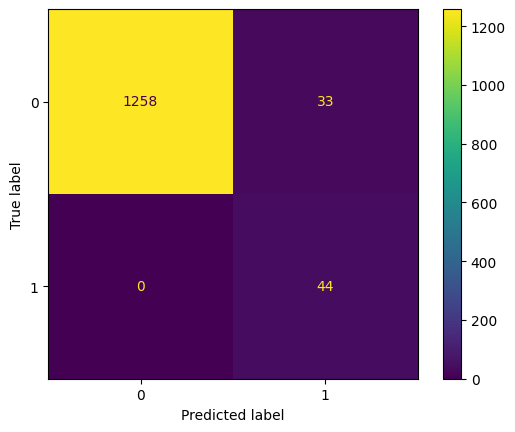

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])